In [26]:
import numpy as np
class Perceptron(object):
    """
    Параметры
    eta : float скорость обучения (от 0.0 до 1.0)
    n_inter : int количество эпох
    random_state : int начальное значение генератора случайных чисел для инициализации случайными весами
    Атрибуты
    w_ одмомерный массив весов
    errors_ список неправильных классификаций в каждой эпохе
    """
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        """
        Обучение персептрона.
        X: {массив обучающих векторов} форма = [n_examples, n_features] (кол-во образцов и кол-во признаков)
        y: {целевые значения} форма = [n_examples] (кол-во значений)
        return: object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+ X.shape[1])
        self.errors_ = []
        for _ in range (self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    def net_input(self, X):
        """Вычисляет общий вход"""
        return np.dot(X, self.w_[1:] + self.w_[0])
    def predict(self, X):
        """Возвращает метку класса после единичного шага"""
        return np.where(self.net_input(X)>=0.0, 1, -1) # если больше 0 - то 1. если меньше нуля -1

In [2]:
import os
import pandas as pd
s = os.path.join('https://archive.ics.uci.edu', 'ml','machine-learning-databases','iris' , 'iris.datа')
print( 'URL: ', s)

URL:  https://archive.ics.uci.edu\ml\machine-learning-databases\iris\iris.datа


In [9]:
df = pd.read_csv('iris/iris.data' ,header=None, encoding=' utf-8' ) 
df.tail()
# 0 - длина чашелистика
# 1 - шрирна чашелистика
# 2 - длина лепестка
# 3 - ширина лепестка
# 4 - название

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


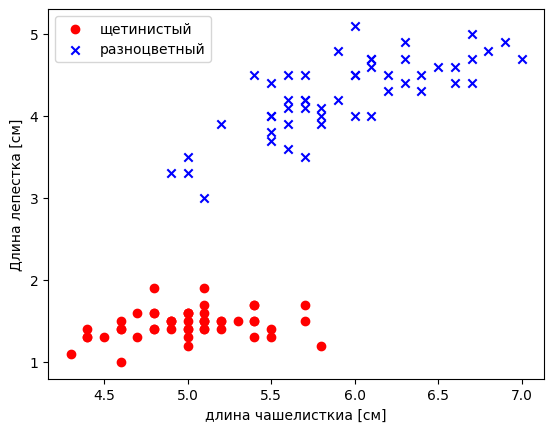

In [17]:
import matplotlib.pyplot as plt
import numpy as np
# создаем обучающую выборку из 100 записей. X - признаки, Y - метки
y = df.iloc[0:100, 4].values
y = np.where(y=='Iris-setosa',-1,1)
X = df.iloc[0:100, [0,2]].values

plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='щетинистый')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x',label='разноцветный')
plt.xlabel('длина чашелисткиа [см]')
plt.ylabel('Длина лепестка [см]')
plt.legend(loc='upper left')
plt.show()


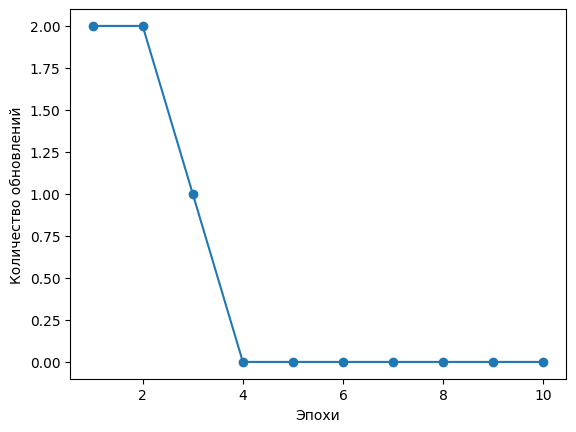

In [35]:
# обучим персептрон
ppn = Perceptron(eta=0.1,n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1), ppn.errors_,marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Количество обновлений')
plt.show()

In [47]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,resolution=0.02):
    markers = ('s','x','o','4','.')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[ :, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution)) 
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # вывести образцы по классам
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black') 

C:\Users\ilyav\AppData\Local\Temp\ipykernel_17580\3118110826.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


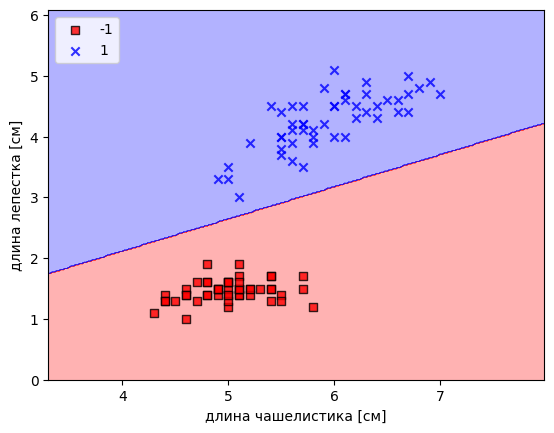

In [49]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('длина чашелистика [см]')
plt.ylabel('длина лепестка [см]')
plt.legend(loc='upper left')
plt.show() 